# CMEMS In-Situ data

All CMEMS in-situ data are provided in a standardised netCDF format including QC flags.

They are also free to use: 

*"These data were collected and made freely available by the Copernicus project and the programs that contribute to it"*

Example downloaded from [CMEMS/EMODNET](https://www.emodnet-physics.eu/Map/platinfo/PIROOSDownload.aspx?PlatformID=13762)

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
ds = xr.open_dataset("../tests/data/BO_TS_MO_FINO2.nc")
ds

<xarray.Dataset>
Dimensions:      (DEPTH: 10, LATITUDE: 34797, LONGITUDE: 34797, POSITION: 34797, TIME: 34797)
Coordinates:
  * TIME         (TIME) datetime64[ns] 2015-10-01 ... 2020-11-07T07:50:00.000...
  * LATITUDE     (LATITUDE) float32 55.01 55.01 55.01 ... 55.01 55.01 55.01
  * LONGITUDE    (LONGITUDE) float32 13.15 13.15 13.15 ... 13.15 13.15 13.15
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    TIME_QC      (TIME) float32 ...
    POSITION_QC  (POSITION) float32 ...
    PSAL         (TIME, DEPTH) float64 ...
    PSAL_QC      (TIME, DEPTH) float32 ...
    TEMP         (TIME, DEPTH) float64 ...
    TEMP_QC      (TIME, DEPTH) float32 ...
    OSAT         (TIME, DEPTH) float64 ...
    OSAT_QC      (TIME, DEPTH) float32 ...
    DEPH         (TIME, DEPTH) float32 ...
    DEPH_QC      (TIME, DEPTH) float32 ...
Attributes:
    naming_authority:               Copernicus Marine In Situ
    ices_platform_code:             
    area:                           Baltic Sea
    format_version:                 1.4
    contact:                        cmems-service@smhi.se
    author:                         cmems-service
    cdm_data_type:                  timeSeries
    summary:                        Oceanographic data from the Baltic Sea. M...
    references:                     http://marine.copernicus.eu http://www.ma...
    data_assembly_center:           SMHI
    wmo_inst_type:                  
    doi:                            https://doi.org/10.13155/59938 https://do...
    citation:                       These data were collected and made freely...
    Conventions:                    CF-1.6 Copernicus-InSituTAC-FormatManual-...
    bottom_depth:                    
    qc_manual:                      Recommendations for in-situ data Near Rea...
    distribution_statement:         These data follow Copernicus standards; t...
    quality_index:                  A
    comment:                        
    netcdf_version:                 netCDF-4 classic model
    source:                         mooring
    geospatial_lon_min:             13.1542
    quality_control_indicator:      1
    history_version:                10
    geospatial_lon_max:             13.1542
    data_type:                      OceanSITES time-series data
    platform_code:                  FINO2
    geospatial_vertical_min:        2.0000
    time_coverage_end:              2020-11-07T07:50:00Z
    id:                             BO_TS_MO_FINO2
    update_interval:                P1M
    last_date_observation:          2020-11-07T07:50:00Z
    time_coverage_start:            2015-10-01T00:00:00Z
    history:                        2019-06-25T13:00:30Z File created by SMHI...
    geospatial_vertical_max:        20.0000
    institution_references:         www.bsh.de
    last_longitude_observation:     13.1542
    pi_name:                        BSH
    geospatial_lat_min:             55.0083
    wmo_platform_code:              
    geospatial_lat_max:             55.0083
    institution_edmo_code:          1850
    data_mode:                      R
    site_code:                      FINO2
    title:                          Global Ocean - In Situ Wave Observations ...
    date_update:                    2020-12-17T13:31:41Z
    platform_name:                  FINO2
    last_latitude_observation:      55.0083
    source_platform_category_code:  48
    institution:                    BSH

In [3]:
ds.attrs['citation']

'These data were collected and made freely available by the Copernicus project and the programs that contribute to it'

## Quality flags

In [4]:
pd.DataFrame({'qc_flag' : ds.PSAL_QC.flag_values,
    'meaning' : ds.PSAL_QC.flag_meanings.split()})

,qc_flag,meaning
0,0,no_qc_performed
1,1,good_data
2,2,probably_good_data
3,3,bad_data_that_are_potentially_correctable
4,4,bad_data
5,5,value_changed
6,6,not_used
7,7,nominal_value
8,8,interpolated_value
9,9,missing_value


# Salinity

Lets's see if we have some outliers...

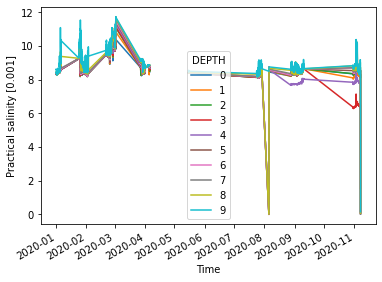

In [5]:
ds.PSAL.sel(TIME=slice("2020","2021")).plot.line(x='TIME');


Qualtity flags indicates not all values are good ()

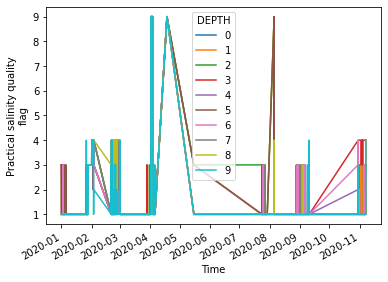

In [6]:
ds.PSAL_QC.sel(TIME=slice("2020","2021")).plot.line(x='TIME');

<AxesSubplot:>

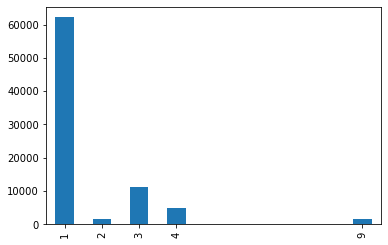

In [7]:
pd.Series(ds.PSAL_QC.sel(TIME=slice("2020","2021")).values.astype(np.int32).flatten()).value_counts().plot.bar() # simple on-liner to get distriution of values

Most values have a qc-flag ==1 (good data). But some have 2,3,4, which are varying degrees of confidence that the data is bad.